In [330]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
%matplotlib inline
# DasData The Living plant www.dasdata.co 
data_url = 'https://dasdata.co/e.aspx?das=l8xjg18bpAO8exltb3CjqUuLsZq9OJ/8rTuMIv6KnhKq73PGywtVdtezj/GwzXM%20vzom%20f%20tl2mazFEr3/qoBA==&from=0&to=400&json=1'

# General data request; include other API keys and credentials as needed in the data argument  
response = requests.get(data_url, data={"limit" : "400"})

if response.status_code == 200:    
    df = pd.DataFrame.from_records(response.json())
 #   print(df) 
    
 

In [331]:
  df[['id', 'AIDate', 'SoilHum', 'RoomTemp', 'RoomHumid', 'AirQVal', 'AirAlarm','RoomLight','Uvi' ]] = df['Table'].apply(pd.Series)
  

In [332]:
df["AIDate"] = pd.to_datetime(df["AIDate"]) 
#df['AIDate'] = pd.to_datetime(df['AIDate'], format="%m/%d/%Y %I:%M:%S %p")
df.set_index('AIDate', inplace=True)
df["RoomTemp"] = df["RoomTemp"].astype('float64') 
df.head()
 

,Table,id,SoilHum,RoomTemp,RoomHumid,AirQVal,AirAlarm,RoomLight,Uvi
AIDate,,,,,,,,,
2019-02-24 10:05:41.607,"{'id': 3707165, 'AIDate': '2019-02-24T10:05:41...",3707165,46,22.5,47.00,50,fresh,87,0.00
2019-02-24 09:57:23.413,"{'id': 3707164, 'AIDate': '2019-02-24T09:57:23...",3707164,46,22.5,48.00,51,fresh,87,0.00
2019-02-24 09:49:05.143,"{'id': 3707163, 'AIDate': '2019-02-24T09:49:05...",3707163,46,22.4,48.00,50,fresh,86,0.00
2019-02-24 09:40:46.410,"{'id': 3707162, 'AIDate': '2019-02-24T09:40:46...",3707162,46,22.0,49.00,51,fresh,86,0.00
2019-02-24 09:32:30.330,"{'id': 3707161, 'AIDate': '2019-02-24T09:32:30...",3707161,46,22.0,49.00,51,fresh,85,0.00


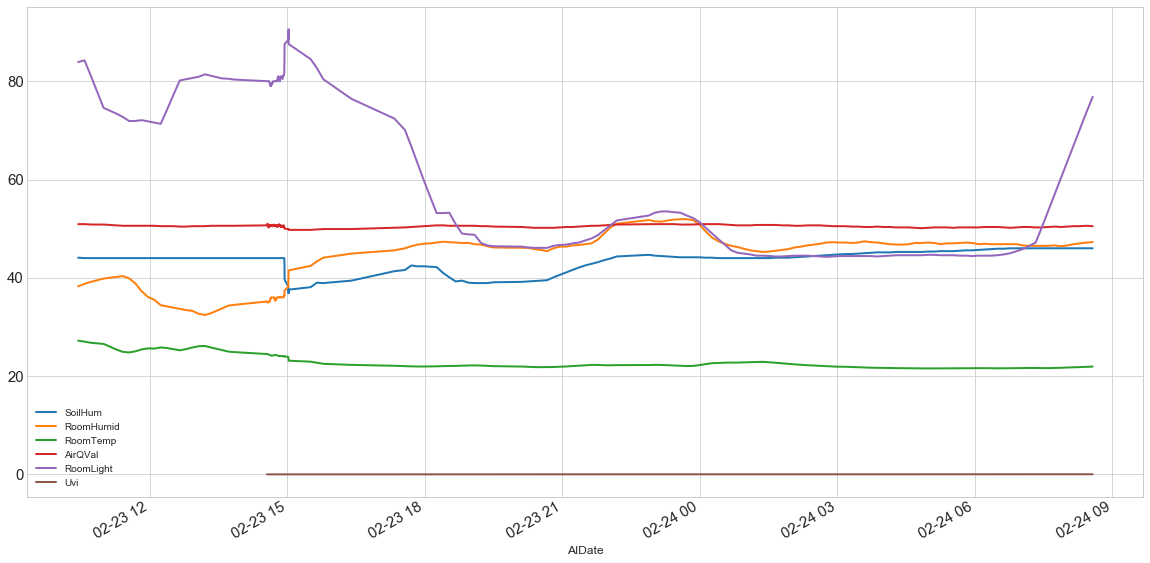

In [333]:
soil_hum = df[['SoilHum']]
#soil_hum.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
room_hum = df[['RoomHumid']]
#room_hum.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
room_temp = df[['RoomTemp']]
airq_room = df[['AirQVal']]
light_room = df[['RoomLight']]
uv_room = df[['Uvi']]
df_rm = pd.concat([soil_hum.rolling(12).mean(), room_hum.rolling(12).mean(),room_temp.rolling(12).mean(),airq_room.rolling(12).mean(),light_room.rolling(12).mean(),uv_room.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=2, fontsize=15)

x = np.linspace(0, 10, 50) 
#room_temp.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

plt.xlabel('AIDate', fontsize=12);